In [1]:
#This program written for PCA Face Feature Extraction as part of Eckovation guided project #1
#The face recognition system consists of a feature extraction step and a classification step.
#Principal component analysis (PCA) is widely used in such scenarios to construct the feature space and 
#extract features, substantially reducing the dimensionality of the input feature vector/image. 
#The reduced feature vector can then be used for the purpose of face analysis.
#Question:
#Using PCA create a face recognition system that gives access to only certain people. 
#To implement this, you can use LFW_peoples dataset provided in the scikit-learn library.
#Given this dataset, use only those classes that have a minimum (use min_faces_per_person = 70, resize = 0.4 )
#70 images (should give you only 11 classes). 
#Given this subset of images, apply PA to obtain the corresponding eigen face for each class.
#You can additionally train a classifier for recognition purpose.

In [2]:
#Import sklearn daatasets, model selection, neural network, numpy, matplotlib
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.svm import SVC

In [3]:
# Preparing/Loading Dataset
dataset = fetch_lfw_people(min_faces_per_person=200, resize=0.4)
#min_faces_per_person modified to get accuracy level. As we increase number min faces per person, 
#the accuracy, f1-score will improve and vice versa.
X = dataset.data
y = dataset.target
target_names = dataset.target_names
images = dataset.images

In [4]:
X.shape

(766, 1850)

In [5]:
n, h, w = images.shape
print(len(target_names))
np.unique(y, return_counts = True)

2


(array([0, 1], dtype=int64), array([236, 530], dtype=int64))

In [6]:
print("Number of faces in current dataset :",n)
print("Height of faces in current dataset (px) :", h)
print("Width of faces in current dataset (px) :", w)

Number of faces in current dataset : 766
Height of faces in current dataset (px) : 50
Width of faces in current dataset (px) : 37


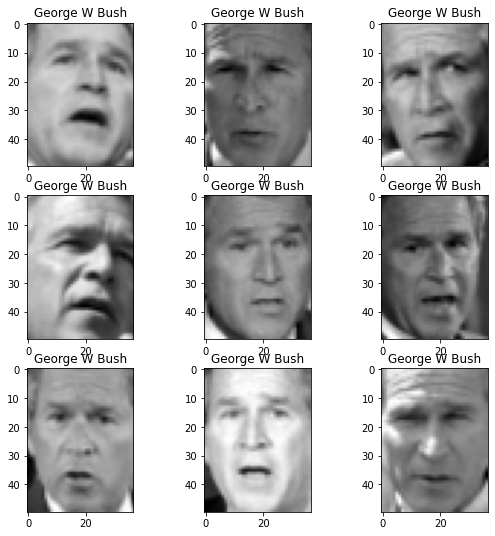

In [7]:
# Plot the images
def plot_img(images, titles, h, w, rows=3, cols=3):
    plt.figure(figsize=(3*cols, 3*rows))
    for i in range(rows*cols):
        plt.subplot(rows, cols, i+1)
        plt.imshow(images[i].reshape(h,w), cmap="gray")
        plt.title(target_names[titles[i]])
plot_img(X, y, h, w)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [9]:
X_train.shape

(689, 1850)

In [10]:
# Fit training dataset
pca = PCA()
pca.fit(X_train)

PCA()

In [11]:
pca.transform(X_train).shape

(689, 689)

In [12]:
var = pca.explained_variance_
print(var)
comp = pca.components_
print(comp.shape)

[4.69403406e+05 4.35843625e+05 1.91461281e+05 1.54132484e+05
 1.34056516e+05 7.84183672e+04 6.79239453e+04 5.84048789e+04
 5.41036406e+04 4.82008594e+04 4.17636484e+04 3.46574883e+04
 3.19630938e+04 3.12227246e+04 2.53411367e+04 2.45025117e+04
 2.37126133e+04 2.05150762e+04 1.93200879e+04 1.83740547e+04
 1.81783574e+04 1.71116328e+04 1.53466133e+04 1.48287939e+04
 1.40249961e+04 1.27463506e+04 1.22188926e+04 1.13470537e+04
 1.07119932e+04 1.05106846e+04 1.01202090e+04 9.88533691e+03
 9.58994824e+03 9.13229199e+03 8.65503027e+03 8.49037402e+03
 8.34196484e+03 7.92906445e+03 7.32479736e+03 7.09589160e+03
 6.89899121e+03 6.80804004e+03 6.55007422e+03 6.40362158e+03
 6.32425049e+03 6.04513232e+03 5.86096924e+03 5.83507031e+03
 5.70688770e+03 5.63631445e+03 5.42762939e+03 5.32516553e+03
 5.24604053e+03 4.97630859e+03 4.94652393e+03 4.77106738e+03
 4.69683008e+03 4.45858984e+03 4.41364551e+03 4.32366162e+03
 4.29093018e+03 4.07953638e+03 3.97908984e+03 3.91810620e+03
 3.88378589e+03 3.778722

In [13]:
val_sum = np.sum(var)
print(val_sum)
sort_indx = np.argsort(var)
sort_indx = sort_indx[::-1]
print(sort_indx)

2575858.5
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 

In [14]:
temp_sum = 0
principal_vec = []
principal_val = []
i = 0
while (temp_sum < 0.98*val_sum):
    principal_vec.append(comp[sort_indx[i], :])
    principal_val.append(var[sort_indx[i]])
    temp_sum += var[sort_indx[i]]
    i += 1
print("Number of components : {}".format(i))

Number of components : 210


In [15]:
principal_vec = np.matrix(principal_vec)
print(principal_vec.shape)

(210, 1850)


In [16]:
X_train_transf = np.dot(X_train, principal_vec.T)
X_test_transf = np.dot(X_test, principal_vec.T)

In [17]:
print("X train features reduction",X_train_transf.shape)
print("X test features reduction",X_test_transf.shape)

X train features reduction (689, 210)
X test features reduction (77, 210)


In [18]:
clf = MLPClassifier(hidden_layer_sizes = (1024, ), batch_size = 128, verbose = True, early_stopping = True)
clf.fit(X_train_transf, y_train)

Iteration 1, loss = 12.59883718
Validation score: 0.666667
Iteration 2, loss = 13.62700126
Validation score: 0.695652
Iteration 3, loss = 6.97577240
Validation score: 0.710145
Iteration 4, loss = 4.33268121
Validation score: 0.840580
Iteration 5, loss = 2.35367195
Validation score: 0.884058
Iteration 6, loss = 1.50826064
Validation score: 0.913043
Iteration 7, loss = 0.22838408
Validation score: 0.898551
Iteration 8, loss = 0.49391167
Validation score: 0.927536
Iteration 9, loss = 0.11239791
Validation score: 0.971014
Iteration 10, loss = 0.10192894
Validation score: 0.956522
Iteration 11, loss = 0.03791191
Validation score: 0.956522
Iteration 12, loss = 0.00647942
Validation score: 0.956522
Iteration 13, loss = 0.01078413
Validation score: 0.956522
Iteration 14, loss = 0.00012718
Validation score: 0.956522
Iteration 15, loss = 0.00764833
Validation score: 0.956522
Iteration 16, loss = 0.00011923
Validation score: 0.956522
Iteration 17, loss = 0.00011832
Validation score: 0.956522
Iter

MLPClassifier(batch_size=128, early_stopping=True, hidden_layer_sizes=(1024,),
              verbose=True)

In [19]:
# Estimate Precision, recall, F1-score
y_pred = clf.predict(X_test_transf)
print(classification_report(y_test, y_pred, target_names = target_names))
#min_faces_per_person modified to get accuracy level. As we increase faces, the accuracy, f1-score will improve and vice versa.

               precision    recall  f1-score   support

 Colin Powell       0.82      0.90      0.86        20
George W Bush       0.96      0.93      0.95        57

     accuracy                           0.92        77
    macro avg       0.89      0.91      0.90        77
 weighted avg       0.93      0.92      0.92        77



In [20]:
print(confusion_matrix(y_test, y_pred, labels=range(len(target_names))))

[[18  2]
 [ 4 53]]


In [21]:
# Plot the images after applying pca
def plot_img(images, titles, h, w, rows=3, cols=3):
    plt.figure(figsize=(4*cols, 4*rows))
    for i in range(rows*cols):
        plt.subplot(rows, cols, i+1)
        plt.imshow(images[i].reshape(h,w), cmap="gray")
        plt.title([titles[i]])
n_components = 200
mean_imgs = []
for i in range(n_components):
    vec = principal_vec[i,:]
    img = vec.reshape((h, w))
    mean_imgs.append(img)
mean_imgs = np.array(mean_imgs)
print(mean_imgs.shape)

(200, 50, 37)


In [22]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

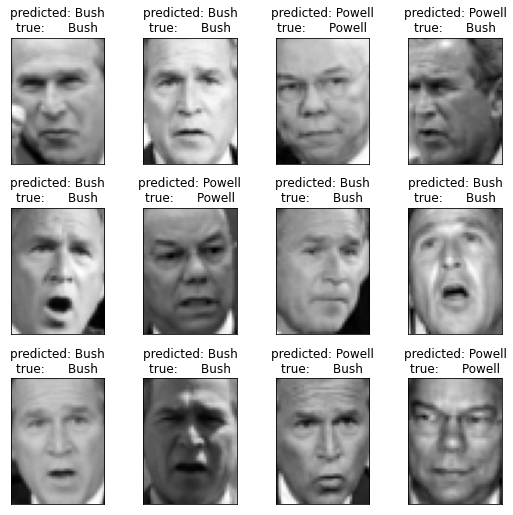

In [23]:
prediction_titles = [title(y_pred, y_test, target_names, i)
                         for i in range(y_pred.shape[0])]
plot_gallery(X_test, prediction_titles, h, w)

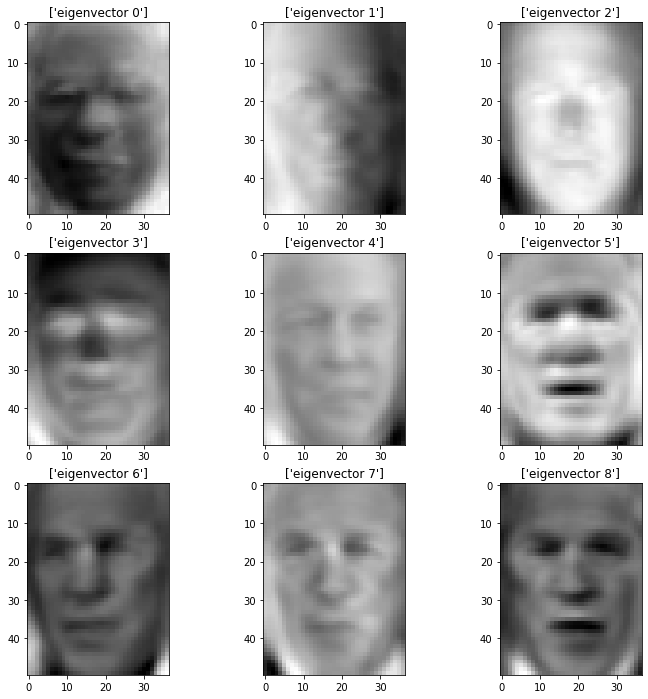

In [24]:
#Estimate Eigen Vector with no of components
pca_titles = [f"eigenvector {i}" for i in range(n_components)]
plot_img(mean_imgs, pca_titles, h, w)

In [25]:
# EStimate the accuracy of the model
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print(score)

0.922077922077922
